In [378]:
# Basic Libraries for Preprocessing
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib

import warnings
warnings.simplefilter("ignore")

In [379]:
# Preprocessing and Feature Engineering Libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Libraries for model training
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [380]:
# Setting up some parameters for the workbook

pd.set_option('display.max_rows', 500)
pd.options.display.max_columns = None

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (25,5)

In [381]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [382]:
folder_path = '/content/drive/MyDrive/Stroke_Prediction/'

In [383]:
data = pd.read_csv(folder_path + 'stroke_data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [384]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [385]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [386]:
data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [387]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

In [388]:
data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [389]:
print(data[data.duplicated()])

Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


In [390]:
data.drop(['id'], axis=1, inplace=True)

In [391]:
data = data[data['gender'] != 'Other']

In [392]:
data['smoking_status'] = data['smoking_status'].replace('Unknown', 'not smokes')

In [393]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


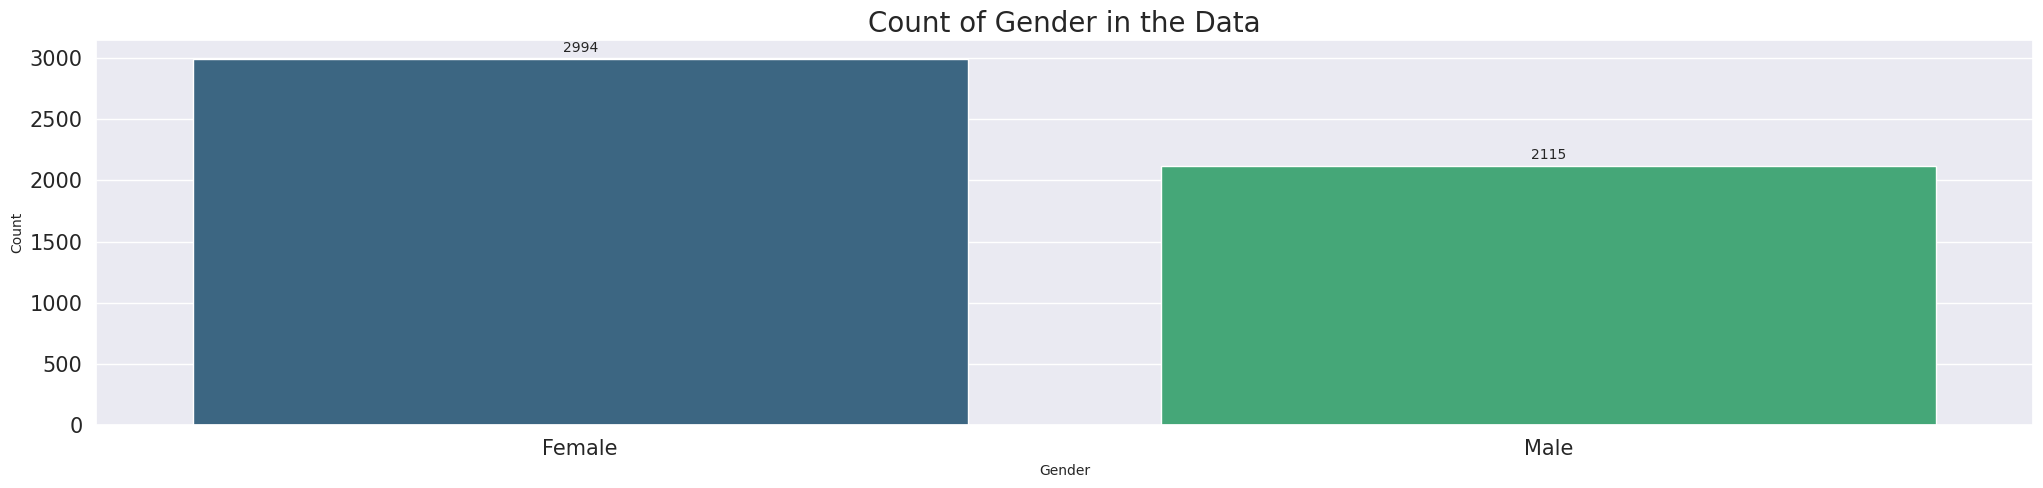

In [394]:
sns.set_style(style="darkgrid")

gender = data['gender'].value_counts().reset_index()
gender.columns  = ['gender', 'count']

fig, axes = plt.subplots(1, 1, sharey=True)

sns.barplot(data=gender, x="gender", y="count", palette='viridis', ax=axes)

for i, row in gender.iterrows():
  axes.annotate(f"{row['count']}", (i, row['count']), textcoords="offset points", xytext=(0, 5), ha="center", fontsize=10)

plt.tick_params(labelsize = 15)
plt.title("Count of Gender in the Data", fontsize=20)
plt.xlabel("Gender", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.show()

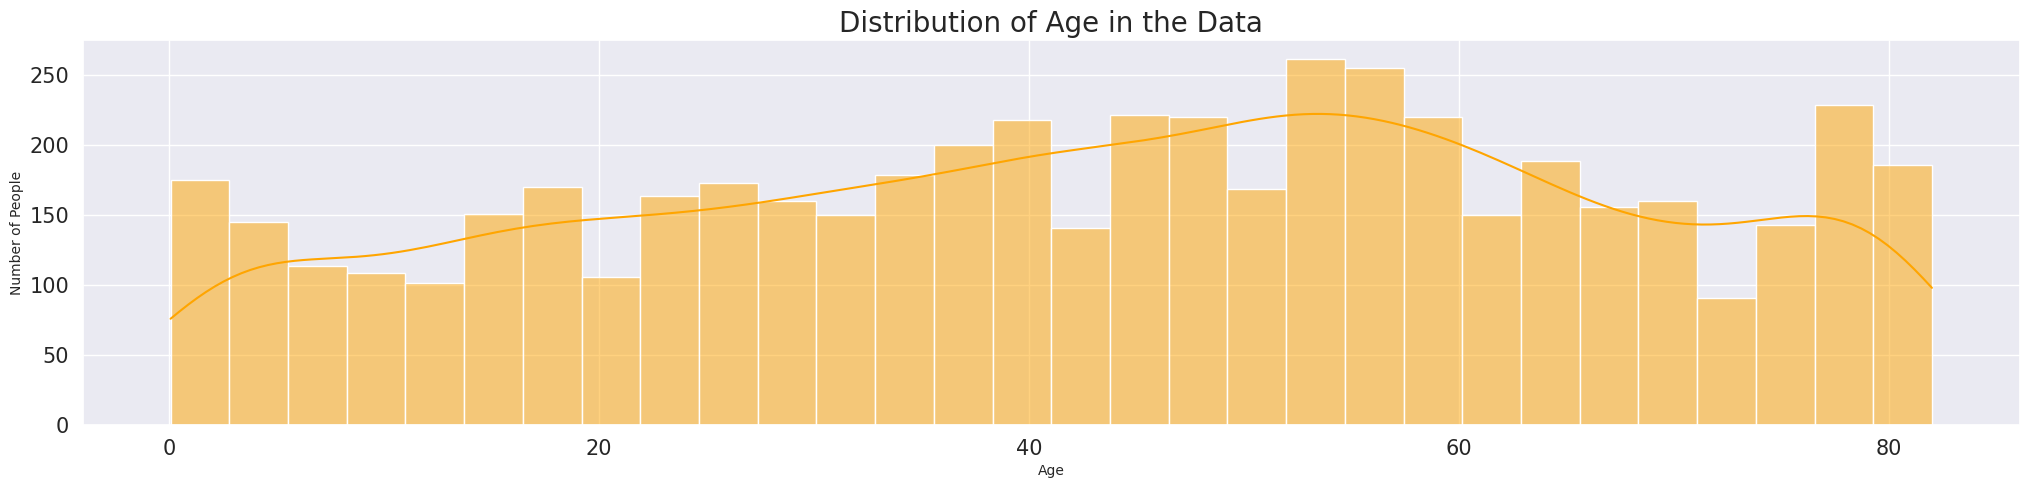

In [395]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.histplot(data=data, x='age',kde=True, bins=30, color='orange', ax=axes)

plt.tick_params(labelsize = 15)
plt.title("Distribution of Age in the Data", fontsize=20)
plt.xlabel("Age", fontsize=10)
plt.ylabel("Number of People", fontsize=10)

plt.show()

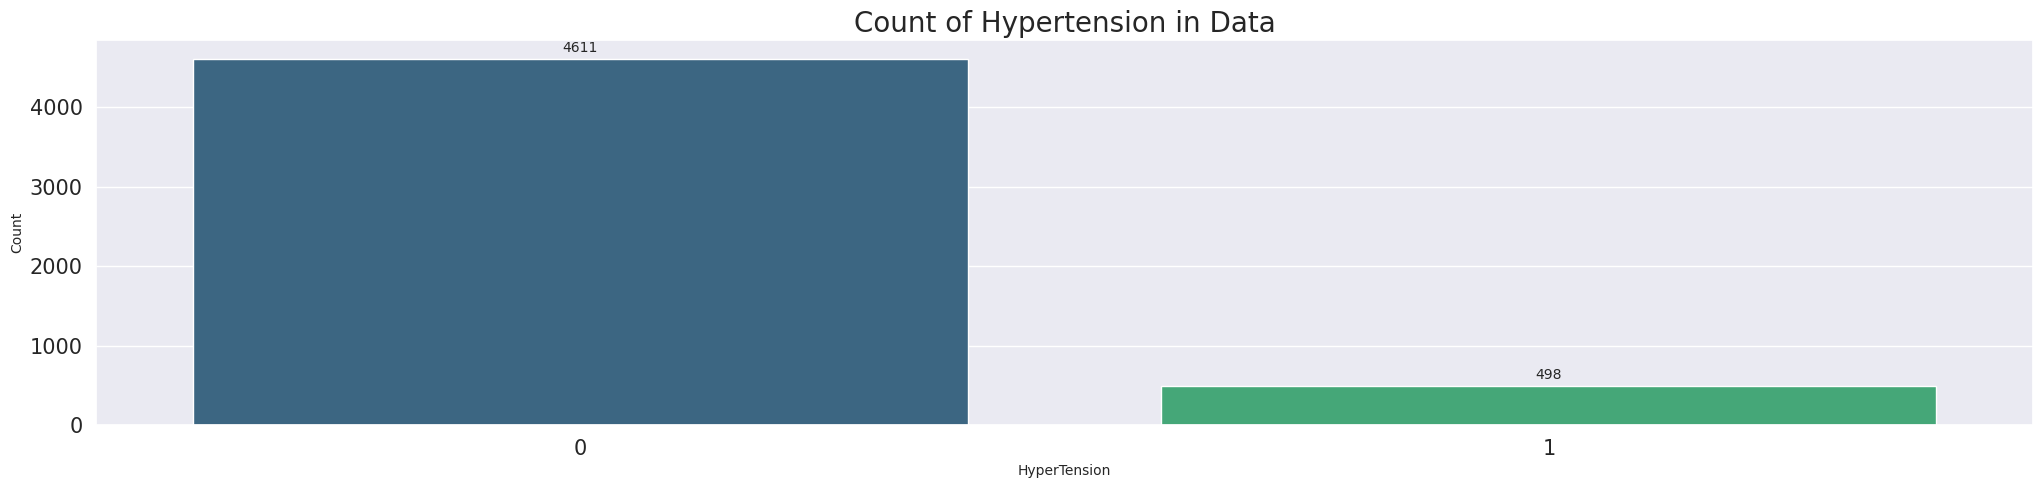

In [396]:
sns.set_style("darkgrid")

hypertension = data['hypertension'].value_counts().reset_index()
hypertension.columns = ['hypertension', 'count']

fig, axes = plt.subplots(1, 1, sharey=True)

sns.barplot(data=hypertension, x='hypertension', y='count', palette='viridis', ax=axes)

for i, row in hypertension.iterrows():
  axes.annotate(f"{row['count']}", (i, row['count']), textcoords="offset points", xytext=(0, 5), ha="center", fontsize=10)

plt.tick_params(labelsize=15)
plt.title("Count of Hypertension in Data", fontsize=20)
plt.xlabel("HyperTension", fontsize=10)
plt.ylabel("Count", fontsize=10)

plt.show()

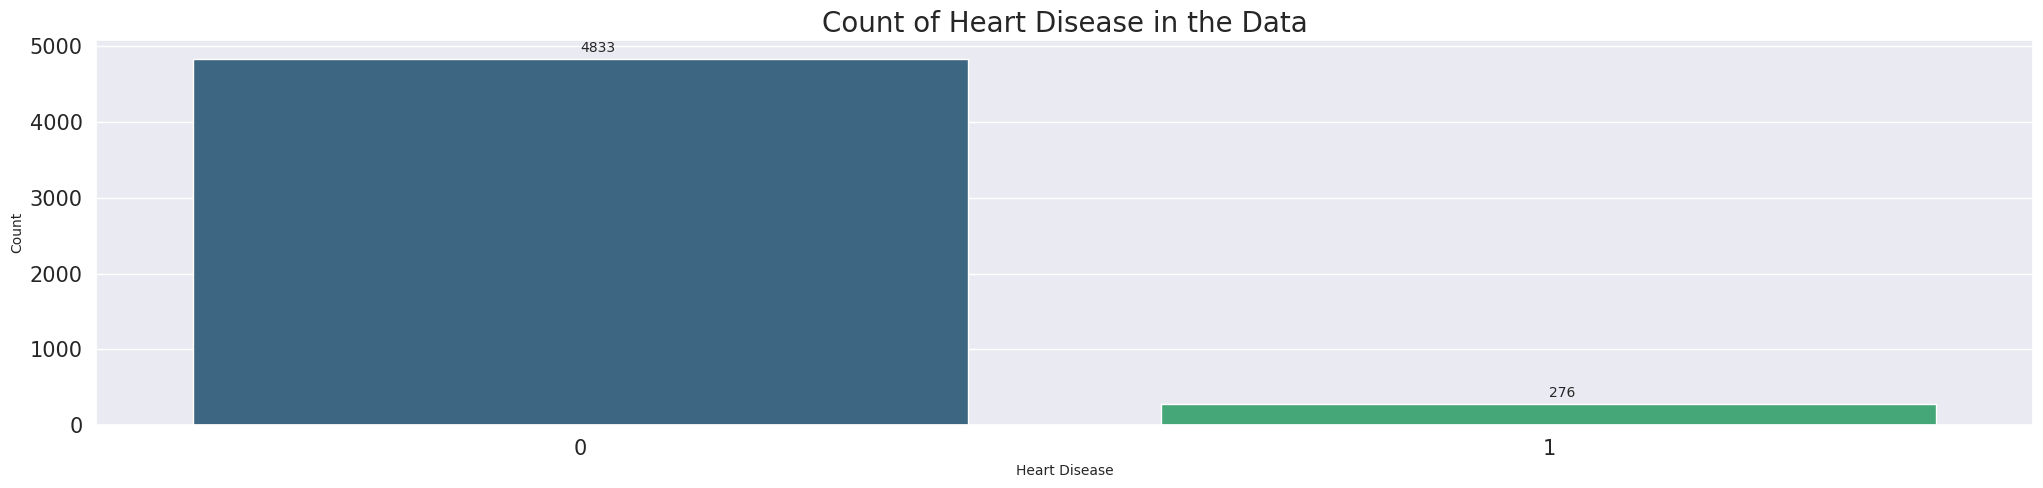

In [397]:
sns.set_style("darkgrid")

h_disease = data['heart_disease'].value_counts().reset_index()
h_disease.columns = ['heart_disease', 'count']

fig, axes = plt.subplots(1, 1, sharey=True)

sns.barplot(data=h_disease, x='heart_disease', y='count', palette='viridis', ax=axes)

for i, row in h_disease.iterrows():
  axes.annotate(f"{row['count']}", (i, row['count']), textcoords="offset points", xytext=(0, 5), fontsize=10)

plt.tick_params(labelsize=15)
plt.title("Count of Heart Disease in the Data", fontsize=20)
plt.xlabel("Heart Disease", fontsize=10)
plt.ylabel("Count", fontsize=10)

plt.show()

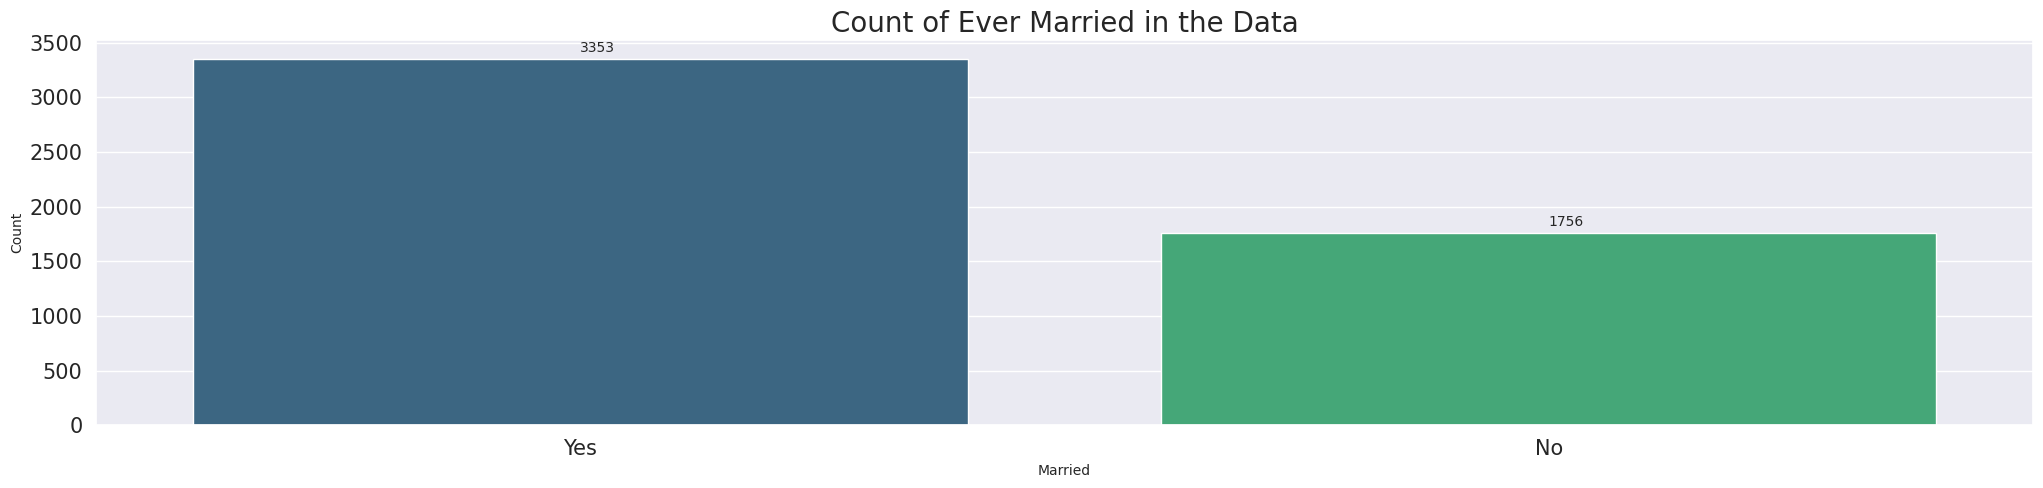

In [398]:
sns.set_style("darkgrid")

h_disease = data['ever_married'].value_counts().reset_index()
h_disease.columns = ['ever_married', 'count']

fig, axes = plt.subplots(1, 1, sharey=True)

sns.barplot(data=h_disease, x='ever_married', y='count', palette='viridis', ax=axes)

for i, row in h_disease.iterrows():
  axes.annotate(f"{row['count']}", (i, row['count']), textcoords="offset points", xytext=(0, 5), fontsize=10)

plt.tick_params(labelsize=15)
plt.title("Count of Ever Married in the Data", fontsize=20)
plt.xlabel("Married", fontsize=10)
plt.ylabel("Count", fontsize=10)

plt.show()

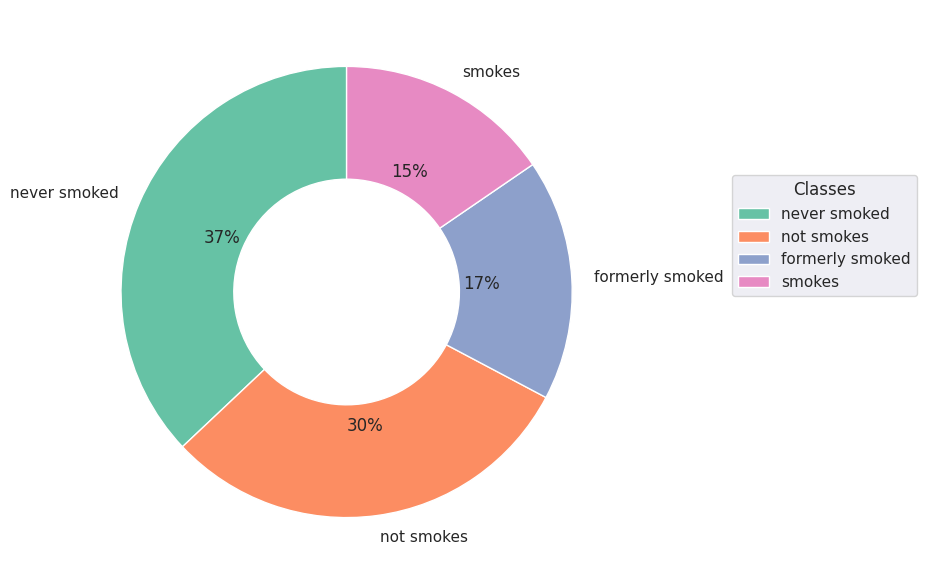

In [399]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

smoke_counts = data['smoking_status'].value_counts()
colors = sns.color_palette("Set2")

fig, ax = plt.subplots(figsize=(8, 6))

wedges, texts, autotexts = ax.pie(
    smoke_counts,
    labels=smoke_counts.index,
    colors=colors,
    startangle=90,
    autopct='%.0f%%',
    wedgeprops=dict(width=0.5)
)

ax.legend(
    wedges,
    smoke_counts.index,
    title="Classes",
    loc="center left",
    bbox_to_anchor=(1.17, 0.6),
    frameon=True
)

ax.set(aspect="equal")

plt.tight_layout()
plt.show()


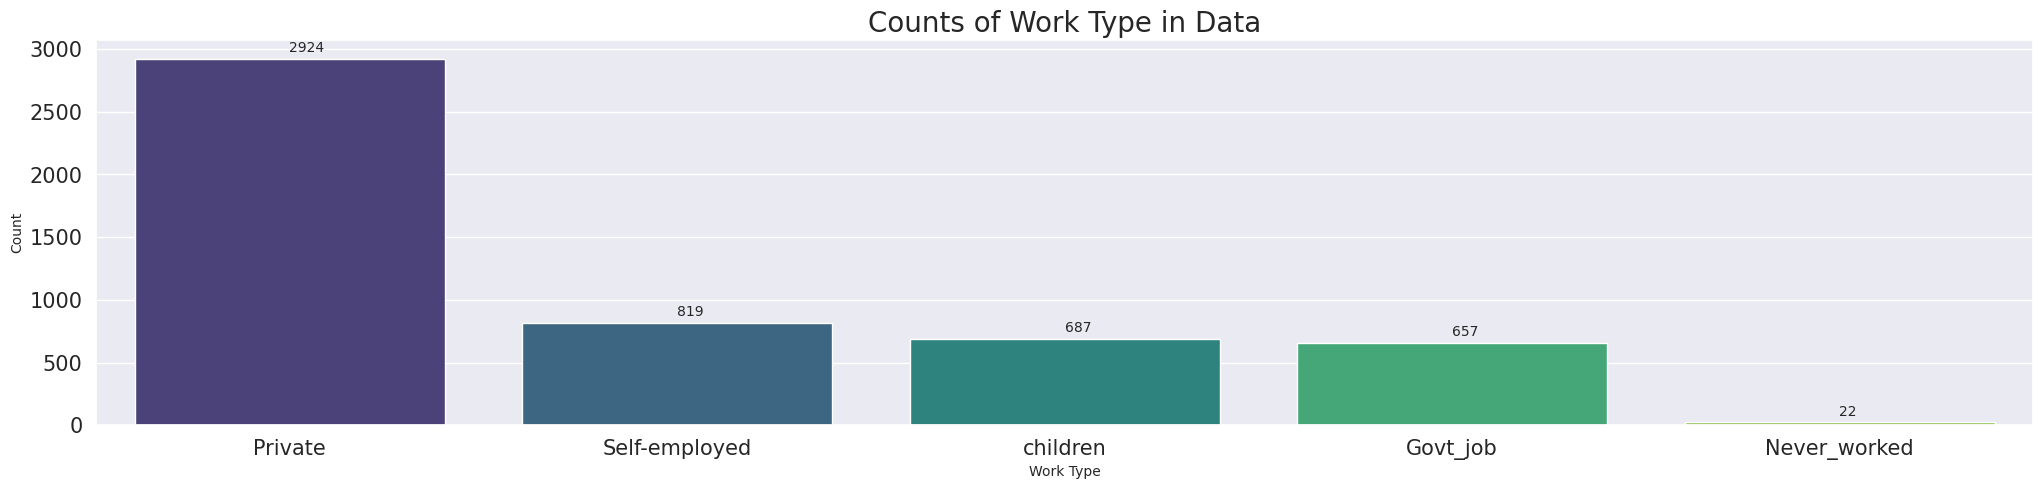

In [400]:
sns.set_style("darkgrid")

work_type = data['work_type'].value_counts().reset_index()
work_type.columns = ['work_type', 'count']

fig, axes = plt.subplots(1, 1, sharey=True)

sns.barplot(data=work_type, x=work_type['work_type'], y=work_type['count'], palette='viridis', ax=axes)

for i, row in work_type.iterrows():
  axes.annotate(f"{row['count']}", (i, row['count']), textcoords="offset points", xytext=(0, 5), fontsize=10)

plt.tick_params(labelsize=15)
plt.title("Counts of Work Type in Data", fontsize=20)
plt.xlabel("Work Type", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.show()

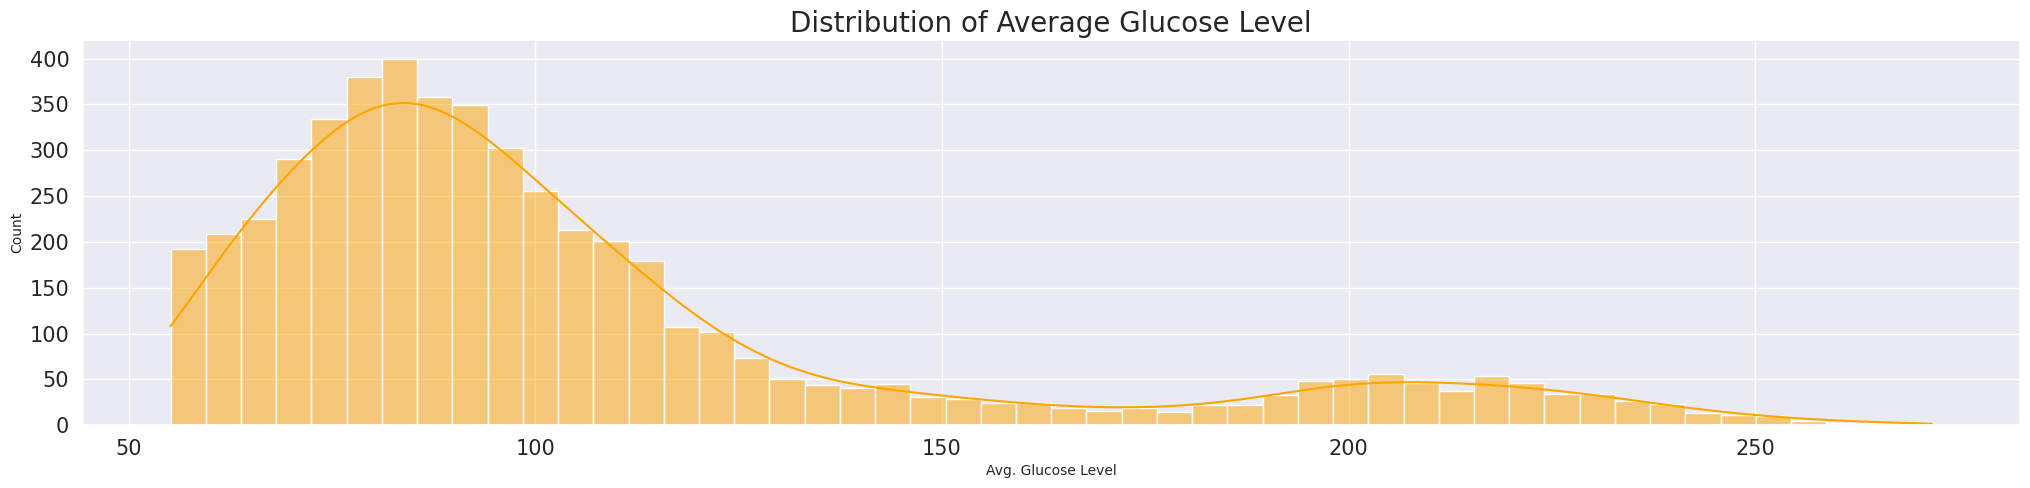

In [401]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.histplot(data=data['avg_glucose_level'], kde=True, bins=50, color="orange", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Distribution of Average Glucose Level", fontsize=20)
plt.xlabel("Avg. Glucose Level", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.show()


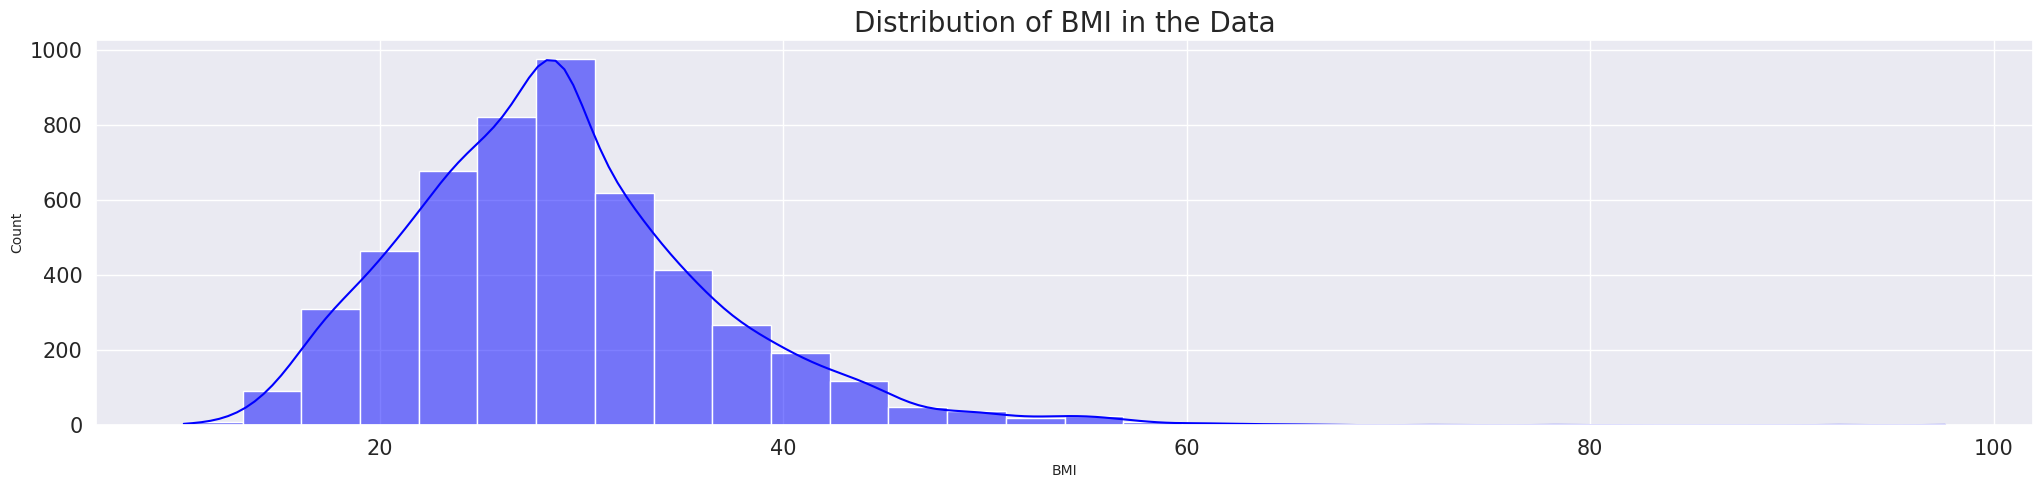

In [402]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.histplot(data=data['bmi'], kde=True, bins=30, color="blue", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Distribution of BMI in the Data", fontsize=20)
plt.xlabel("BMI", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.show()

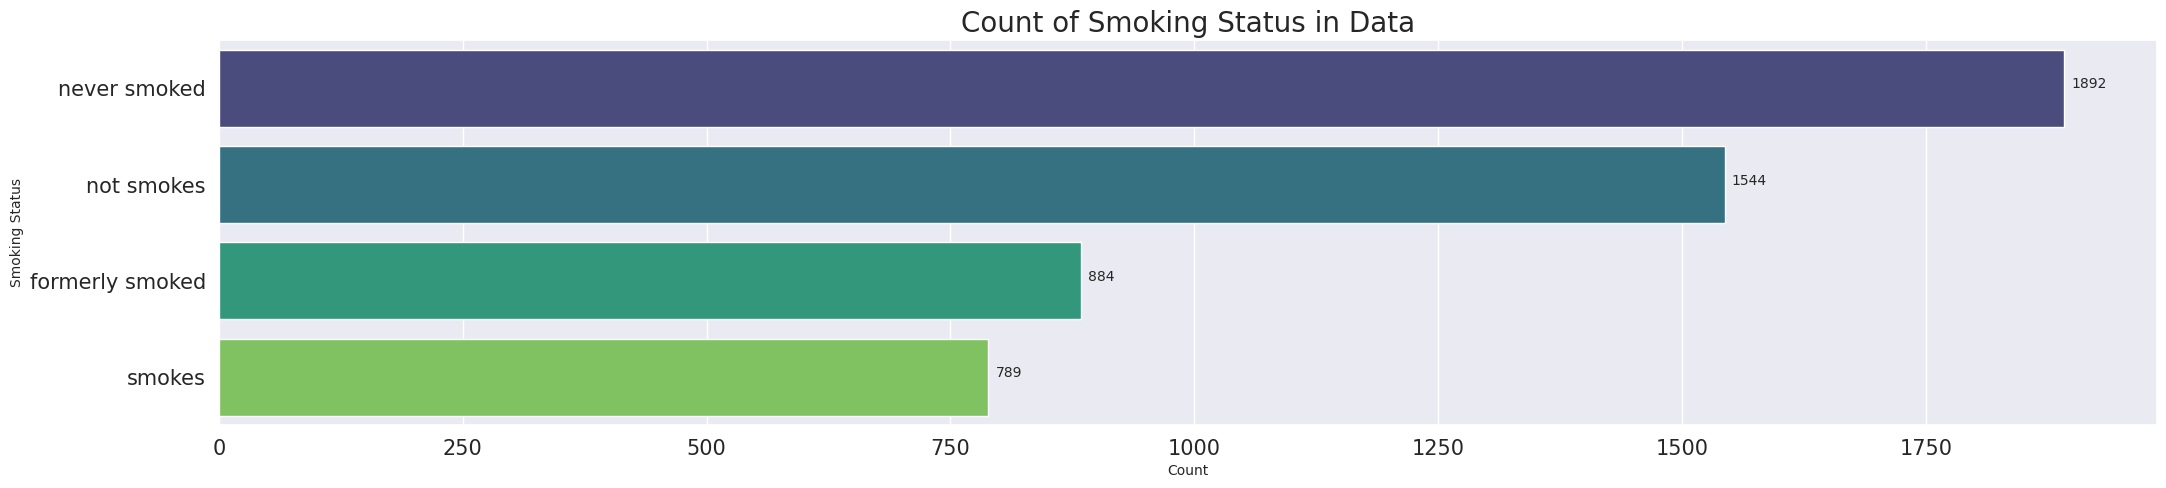

In [403]:
sns.set_style("darkgrid")

s_status = data['smoking_status'].value_counts().reset_index()
s_status.columns = ['smoking_status', 'count']

fig, axes = plt.subplots(1, 1, sharey=True)

sns.barplot(data=s_status, x=s_status['count'], y=s_status['smoking_status'], palette="viridis", ax=axes)

for i, row in s_status.iterrows():
  axes.annotate(f"{row['count']}", (row['count'], i), textcoords="offset points", xytext = (5, 0), fontsize=10)

plt.tick_params(labelsize=15)
plt.title("Count of Smoking Status in Data", fontsize=20)
plt.xlabel("Count", fontsize=10)
plt.ylabel("Smoking Status", fontsize=10)
plt.show()

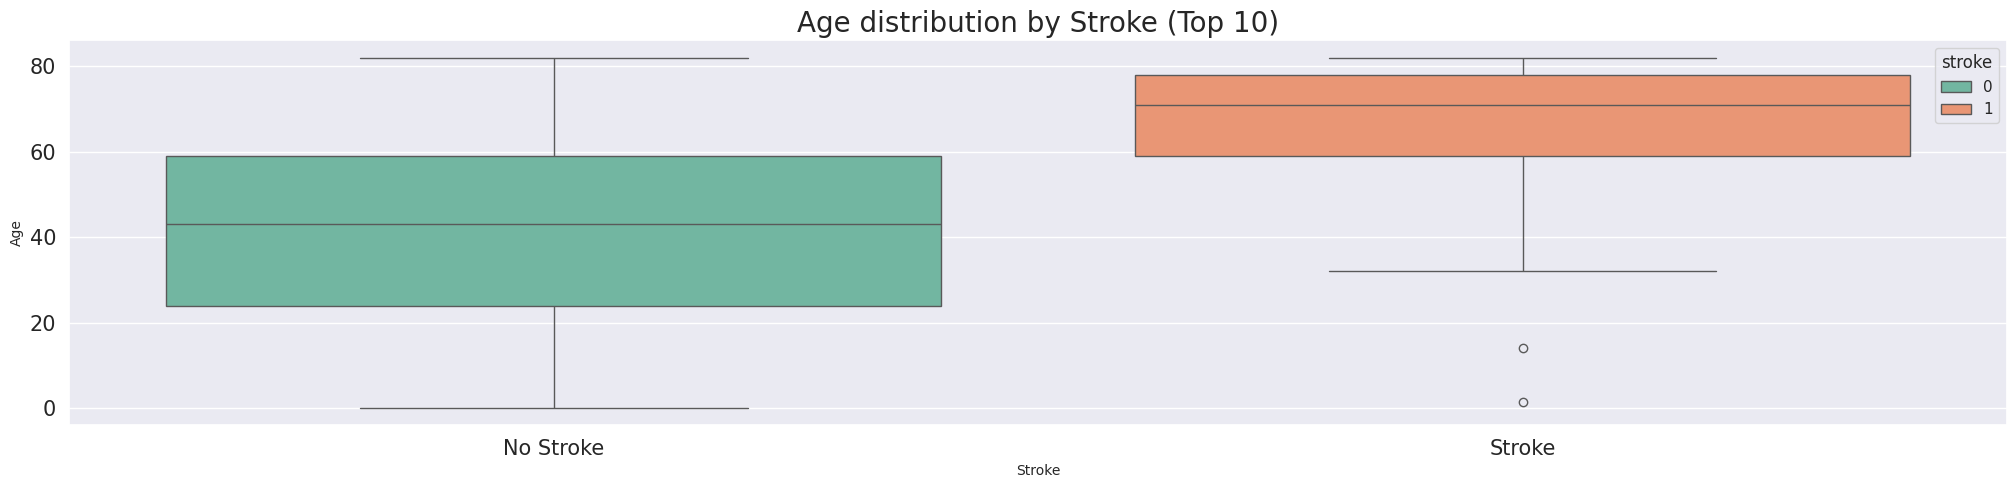

In [404]:
sns.set_style('darkgrid')

fig, axes = plt.subplots(1, 1, sharey=True)

sns.boxplot(data=data, x="stroke", y="age", hue="stroke", palette="Set2", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Age distribution by Stroke (Top 10)", fontsize=20)
plt.xlabel("Stroke", fontsize=10)
plt.ylabel("Age", fontsize=10)
plt.xticks([0, 1], ['No Stroke', 'Stroke'])

plt.show()

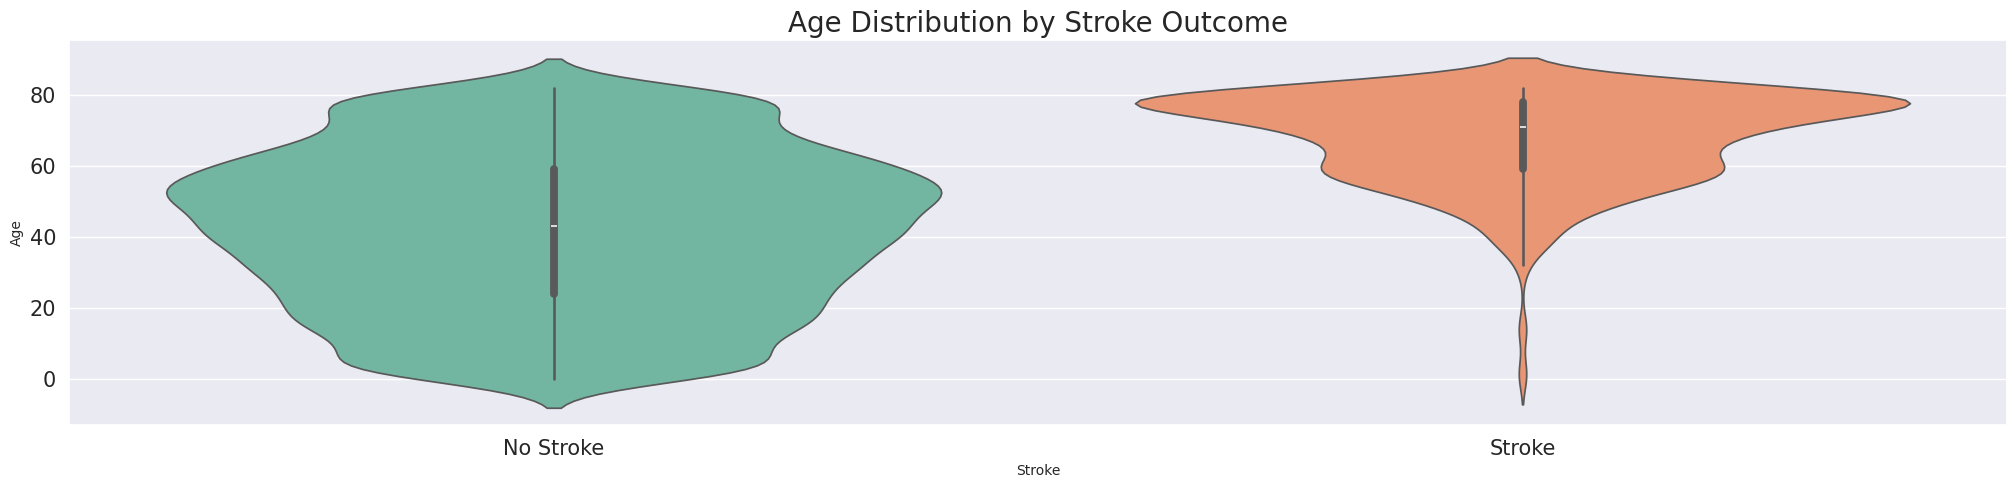

In [405]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.violinplot(data=data, x="stroke", y="age", palette="Set2", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Age Distribution by Stroke Outcome", fontsize=20)
plt.xlabel("Stroke", fontsize=10)
plt.ylabel("Age", fontsize=10)
plt.xticks([0,1], ["No Stroke", "Stroke"])

plt.show()


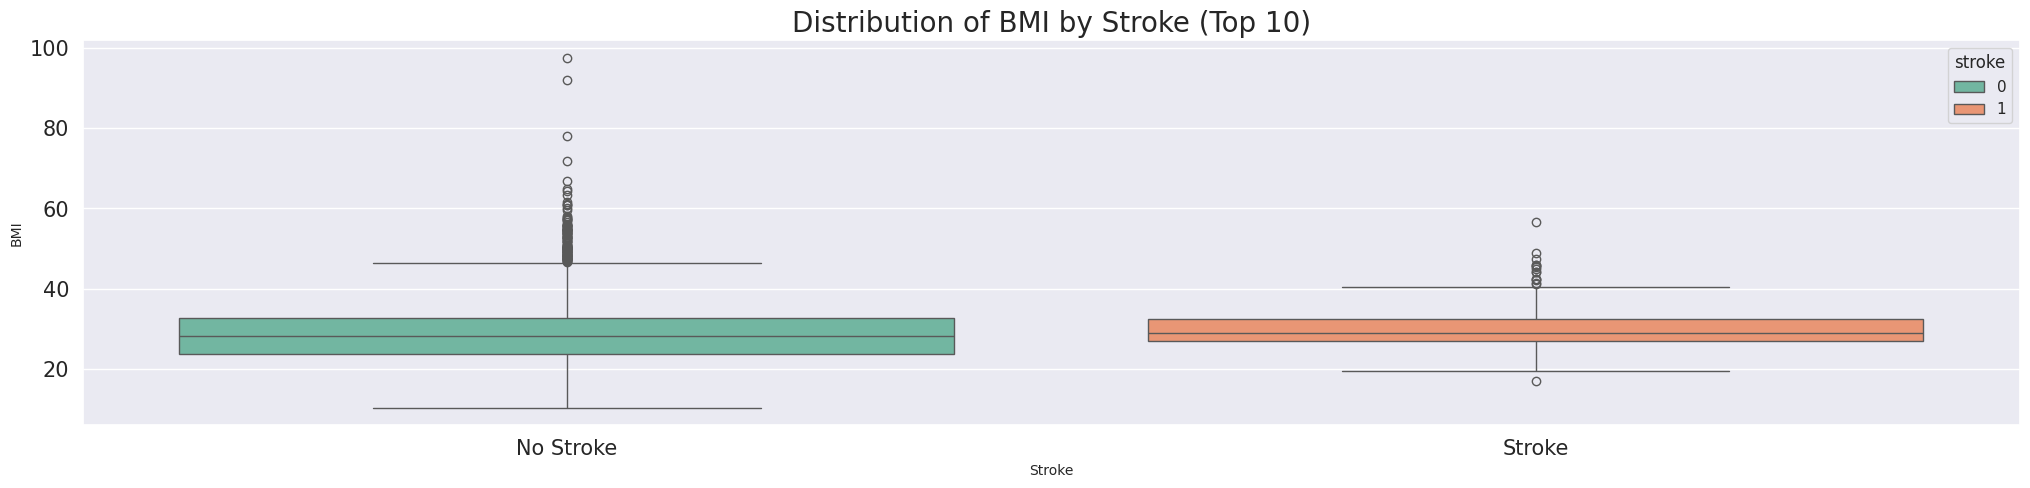

In [406]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.boxplot(data=data, x="stroke", y="bmi", hue="stroke", palette="Set2", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Distribution of BMI by Stroke (Top 10)", fontsize=20)
plt.xlabel("Stroke", fontsize=10)
plt.ylabel("BMI", fontsize=10)
plt.xticks([0, 1], ['No Stroke', 'Stroke'])

plt.show()

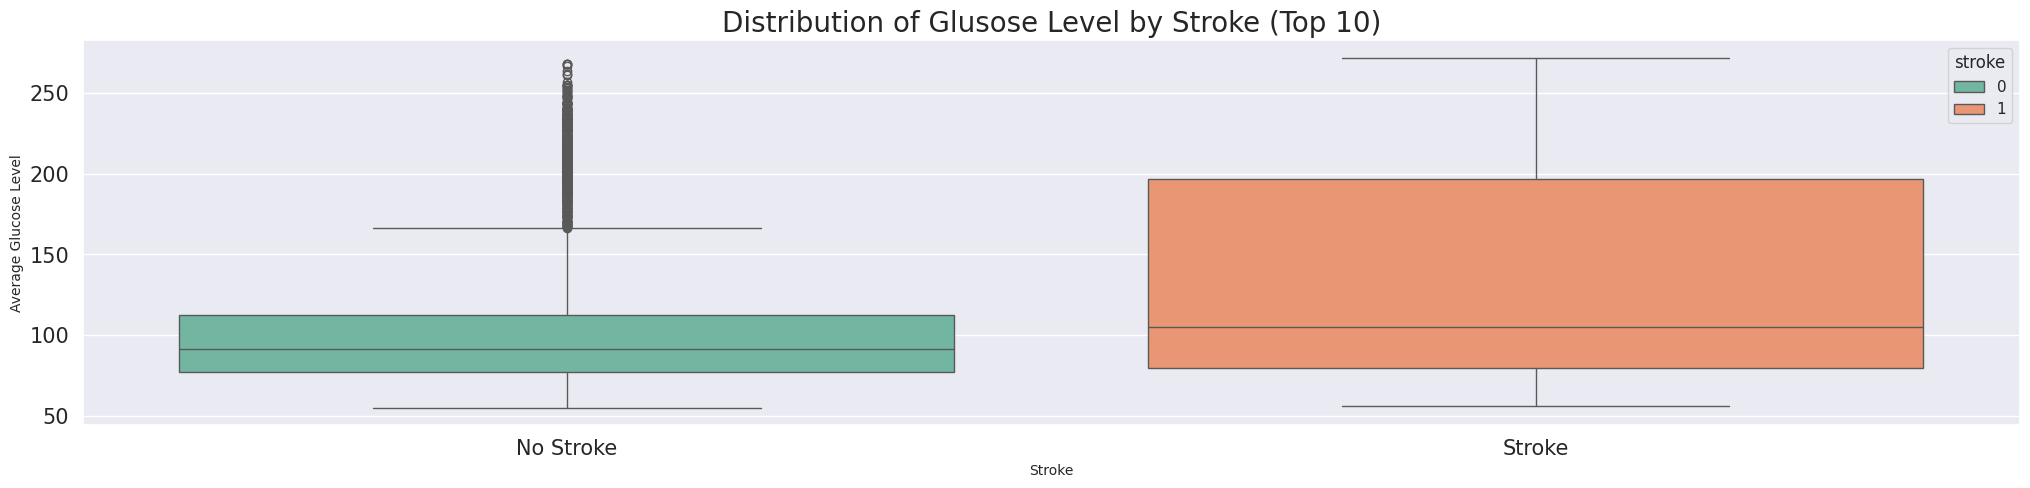

In [407]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.boxplot(data=data, x="stroke", y="avg_glucose_level", hue="stroke", palette="Set2", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Distribution of Glusose Level by Stroke (Top 10)", fontsize=20)
plt.xlabel("Stroke", fontsize=10)
plt.ylabel("Average Glucose Level", fontsize=10)
plt.xticks([0, 1], ['No Stroke', 'Stroke'])

plt.show()

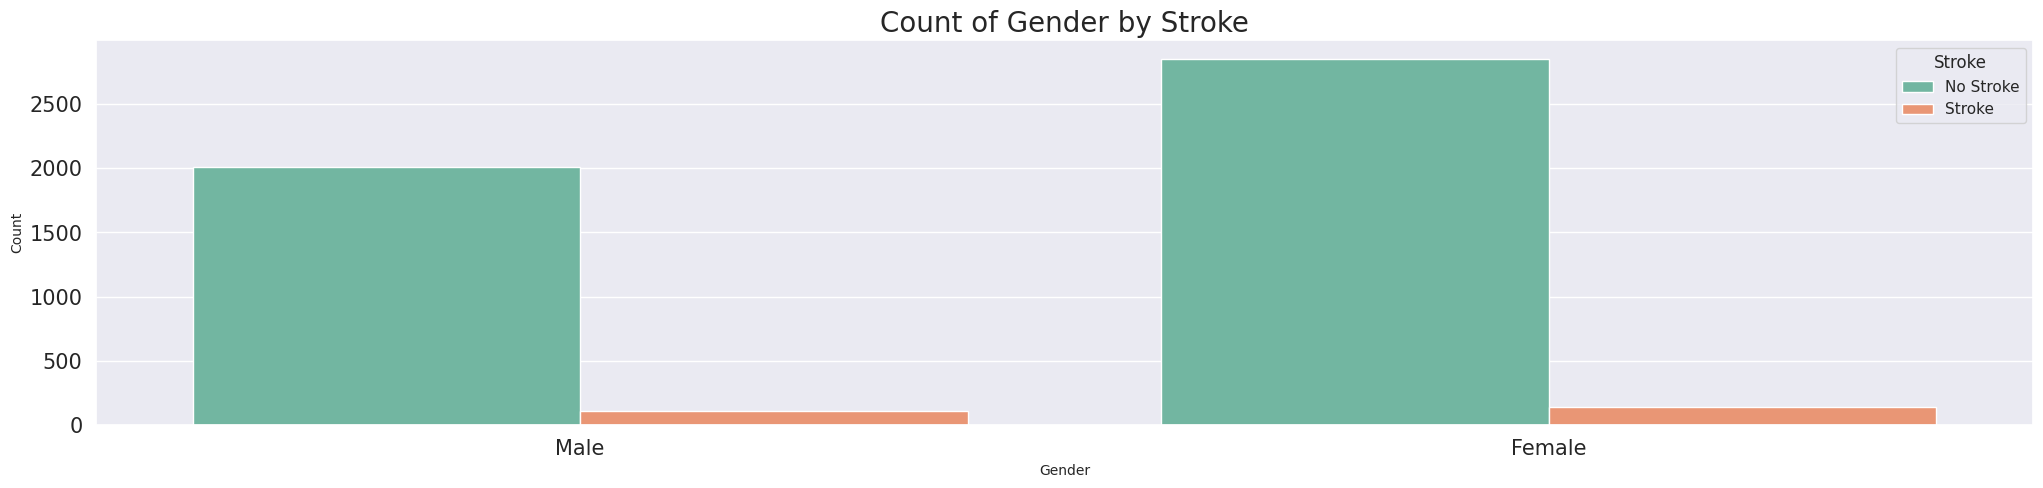

In [408]:
sns.set_style('darkgrid')

fig, axes = plt.subplots(1, 1, sharey=True)

sns.countplot(data=data, x="gender", hue="stroke", palette="Set2", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Count of Gender by Stroke", fontsize=20)
plt.xlabel("Gender", fontsize=10)
plt.ylabel("Count", fontsize=10)
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, ['No Stroke', 'Stroke'], title="Stroke")

plt.show()

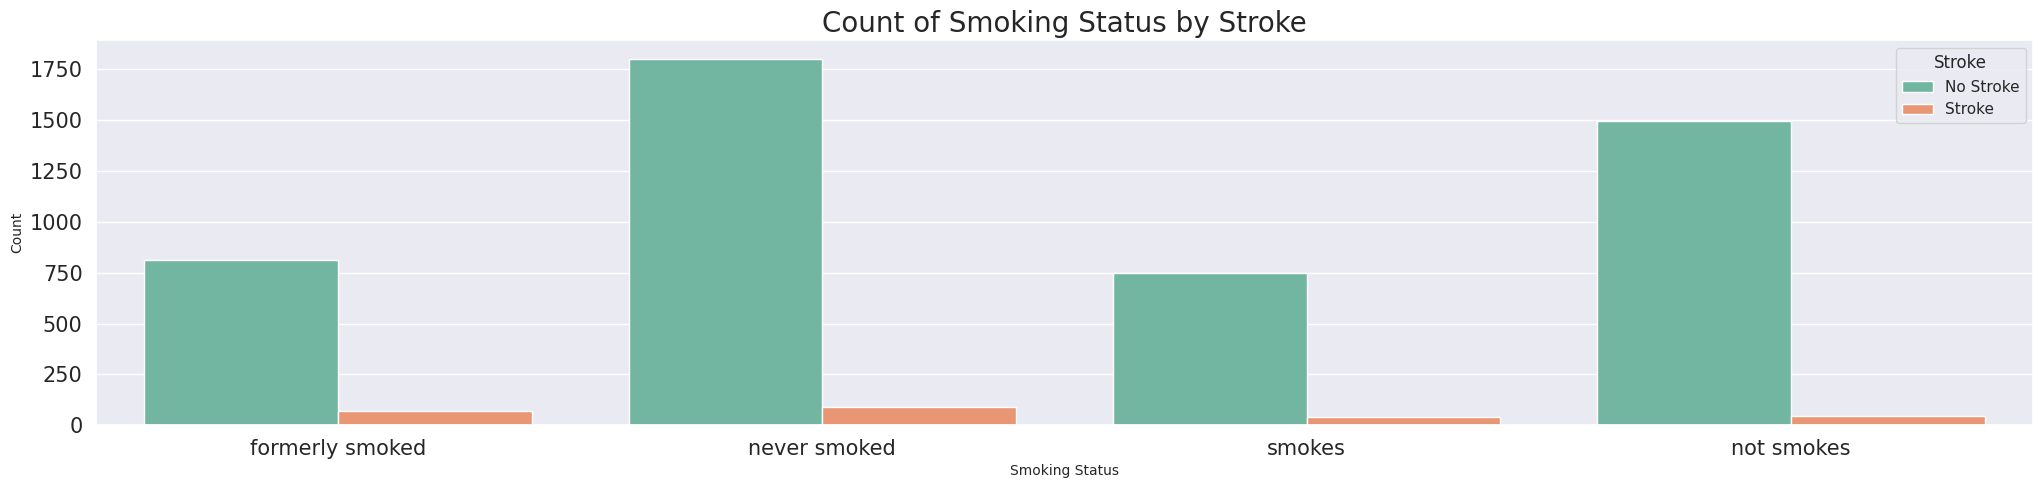

In [409]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.countplot(data=data, x='smoking_status', hue='stroke', palette="Set2", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Count of Smoking Status by Stroke", fontsize=20)
plt.xlabel("Smoking Status", fontsize=10)
plt.ylabel("Count", fontsize=10)
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, ['No Stroke', 'Stroke'], title='Stroke')

plt.show()

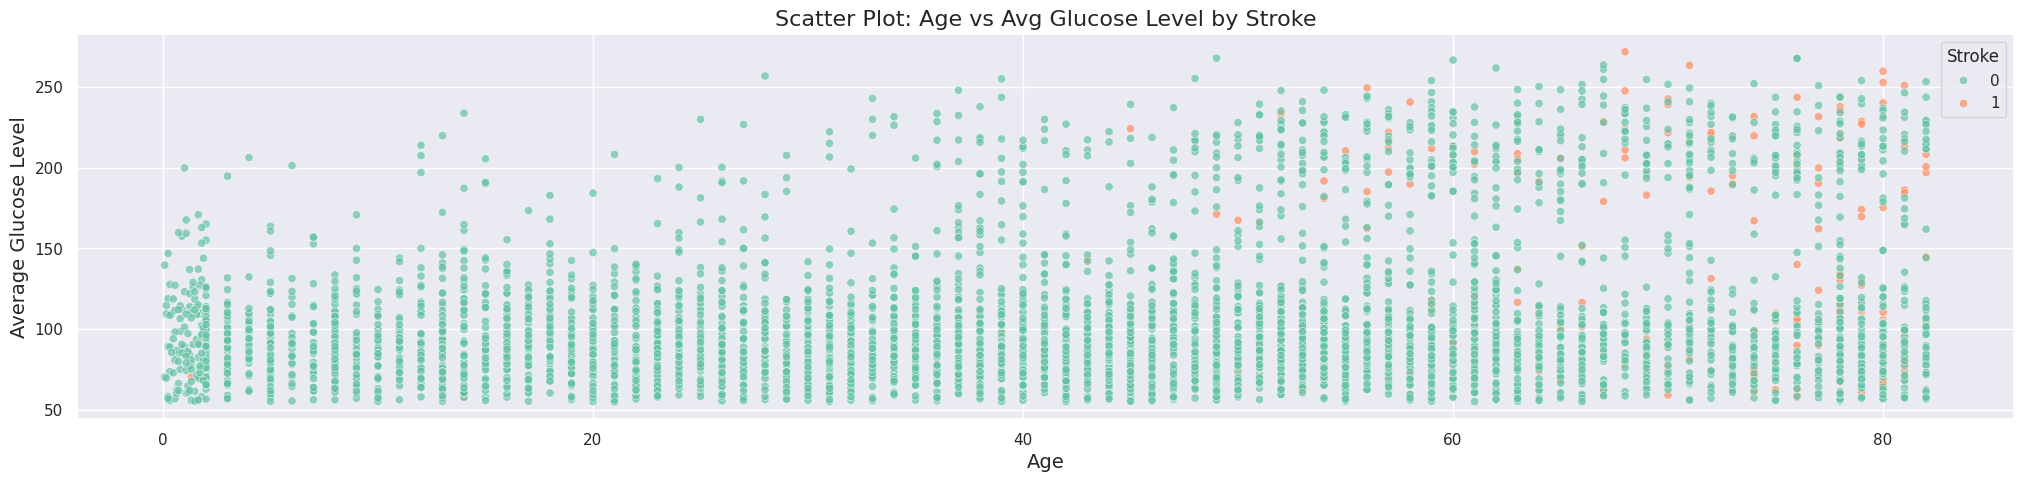

In [410]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.scatterplot(data=data, x="age", y="avg_glucose_level", hue="stroke", palette="Set2", alpha=0.7)

plt.title("Scatter Plot: Age vs Avg Glucose Level by Stroke", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Average Glucose Level", fontsize=14)
plt.legend(title="Stroke")

plt.show()

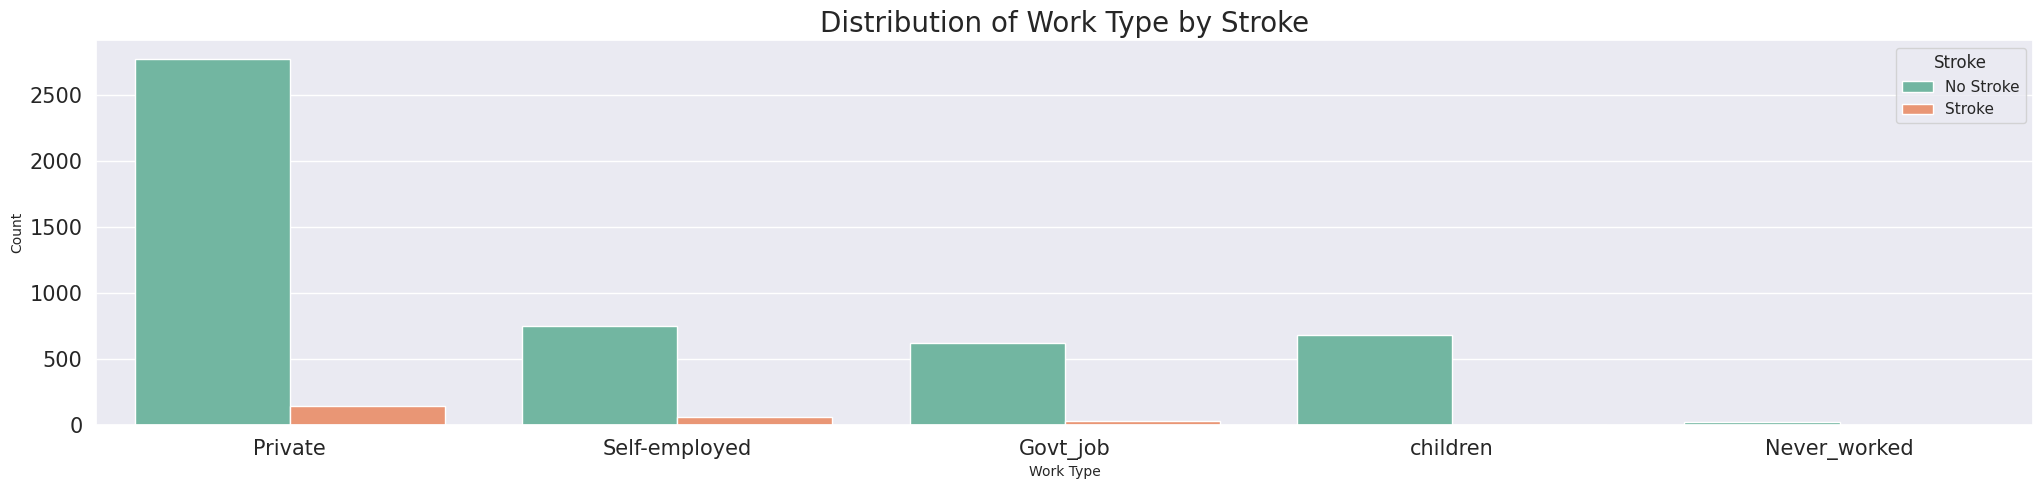

In [411]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.countplot(data=data, x='work_type', hue='stroke', palette="Set2", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Distribution of Work Type by Stroke", fontsize=20)
plt.xlabel("Work Type", fontsize=10)
plt.ylabel("Count", fontsize=10)
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, ['No Stroke', 'Stroke'], title='Stroke')

plt.show()

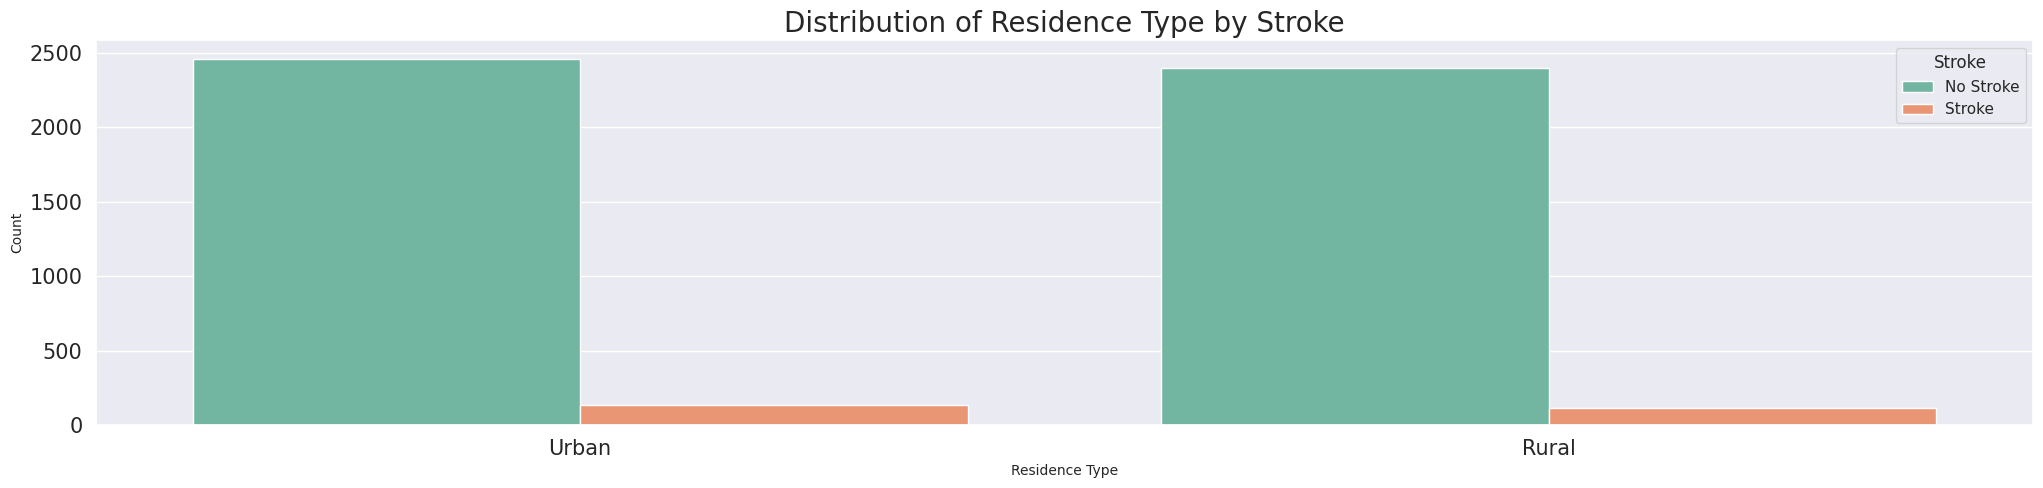

In [412]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.countplot(data=data, x='Residence_type', hue='stroke', palette="Set2", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Distribution of Residence Type by Stroke", fontsize=20)
plt.xlabel("Residence Type", fontsize=10)
plt.ylabel("Count", fontsize=10)
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, ['No Stroke', 'Stroke'], title='Stroke')

plt.show()

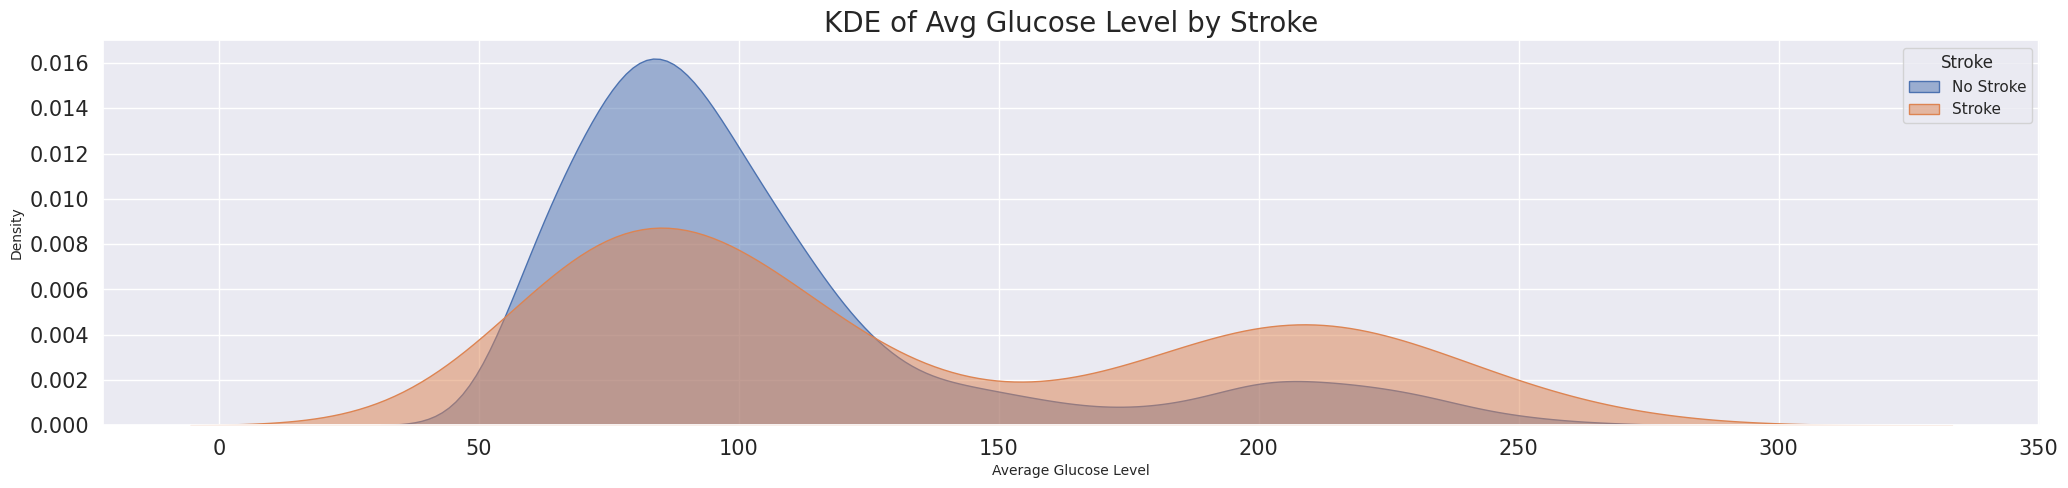

In [413]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.kdeplot(data=data[data['stroke'] == 0], x='avg_glucose_level', label="No Stroke", fill=True, alpha=0.5, ax=axes)
sns.kdeplot(data=data[data['stroke'] == 1], x='avg_glucose_level', label="Stroke", fill=True, alpha=0.5, ax=axes)

plt.tick_params(labelsize=15)
plt.title("KDE of Avg Glucose Level by Stroke", fontsize=20)
plt.xlabel("Average Glucose Level", fontsize=10)
plt.ylabel("Density", fontsize=10)
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, ['No Stroke', 'Stroke'], title='Stroke')

plt.show()

In [414]:
bins = [0, 18, 35, 50, 65, 100]
labels = ['Child', 'Young Adult', 'Adult', 'Senior', 'Elder']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

In [415]:
def bmi_category(bmi):
  if bmi<18.5:
    return 'Underweight'
  elif 18.5 <= bmi < 25:
      return 'Normal'
  elif 25 <= bmi < 30:
      return 'Overweight'
  else:
      return 'Obese'

data['bmi_category'] = data['bmi'].apply(bmi_category)

In [416]:
def glucose_category(glucose):
    if glucose < 140:
        return 'Normal'
    elif 140 <= glucose < 200:
        return 'Pre-diabetic'
    else:
        return 'Diabetic'

data['glucose_category'] = data['avg_glucose_level'].apply(glucose_category)

In [417]:
data['gender'] = data['gender'].map({"Male":1, "Female":0})
data['ever_married'] = data['ever_married'].map({"Yes":1, "No":0})
data['Residence_type'] = data['Residence_type'].map({"Urban":1, "Rural":0})

In [418]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded = encoder.fit_transform(data[['work_type', 'smoking_status']])
columns = encoder.get_feature_names_out(['work_type', 'smoking_status'])

encoded_df = pd.DataFrame(encoded, columns=columns)
data = pd.concat([data.drop(['work_type', 'smoking_status'], axis=1), encoded_df], axis=1)

joblib.dump(encoder, folder_path+'onehot_encoder.pkl')

['/content/drive/MyDrive/Stroke_Prediction/onehot_encoder.pkl']

In [419]:
label_encoders = {}

for col in ['age_group', 'bmi_category', 'glucose_category']:
  le = LabelEncoder()
  data[col] = le.fit_transform(data[col])
  label_encoders[col] = le

joblib.dump(label_encoders, folder_path+'label_encoders.pkl')

['/content/drive/MyDrive/Stroke_Prediction/label_encoders.pkl']

In [420]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,age_group,bmi_category,glucose_category,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_not smokes,smoking_status_smokes
0,1.0,67.0,0.0,1.0,1.0,1.0,228.69,36.600000,1.0,2,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,61.0,0.0,0.0,1.0,0.0,202.21,28.893237,1.0,3,2,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,80.0,0.0,1.0,1.0,0.0,105.92,32.500000,1.0,2,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,49.0,0.0,0.0,1.0,1.0,171.23,34.400000,1.0,0,1,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,79.0,1.0,0.0,1.0,0.0,174.12,24.000000,1.0,2,0,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [421]:
scalar = StandardScaler()
data[['age', 'bmi', 'avg_glucose_level']] = scalar.fit_transform(data[['age', 'bmi', 'avg_glucose_level']])

joblib.dump(scalar, folder_path+'standard_scaler.pkl')

['/content/drive/MyDrive/Stroke_Prediction/standard_scaler.pkl']

In [422]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,age_group,bmi_category,glucose_category,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_not smokes,smoking_status_smokes
0,1.0,1.051242,0.0,1.0,1.0,1.0,2.706450,1.001041,1.0,2,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.785889,0.0,0.0,1.0,0.0,2.121652,-0.000165,1.0,3,2,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,1.626174,0.0,1.0,1.0,0.0,-0.004867,0.468399,1.0,2,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.255182,0.0,0.0,1.0,1.0,1.437473,0.715233,1.0,0,1,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.581949,1.0,0.0,1.0,0.0,1.501297,-0.635858,1.0,2,0,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [423]:
data.isnull().sum()

,0
gender,1
age,1
hypertension,1
heart_disease,1
ever_married,1
Residence_type,1
avg_glucose_level,1
bmi,1
stroke,1
age_group,0


In [424]:
data.dropna(inplace=True)

In [425]:
X = data.drop(columns=['stroke'])
y = data['stroke']

In [426]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [427]:
model_train_evaluation = {}
model_test_evaluation = {}

In [428]:
svc_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    class_weight='balanced',
    probability=True,
    random_state=42
)

svc_model.fit(X_train, y_train)

y_train_pred = svc_model.predict(X_train)
y_test_pred = svc_model.predict(X_test)

train_result = {
    "Accuracy": accuracy_score(y_train, y_train_pred),
    "Precision": precision_score(y_train, y_train_pred),
    "Recall": recall_score(y_train, y_train_pred),
    "F1 Score": f1_score(y_train, y_train_pred)
}

test_result = {
    "Accuracy": accuracy_score(y_test, y_test_pred),
    "Precision": precision_score(y_test, y_test_pred),
    "Recall": recall_score(y_test, y_test_pred),
    "F1 Score": f1_score(y_test, y_test_pred)
}

model_train_evaluation["SVC"] = train_result
model_test_evaluation["SVC"] = test_result

In [429]:
print(f"SVC Training Result {train_result}")
print(f"SVC Test Result {test_result}")

SVC Training Result {'Accuracy': 0.7633382280959373, 'Precision': 0.14737793851717904, 'Recall': 0.8716577540106952, 'F1 Score': 0.25212683681361175}
SVC Test Result {'Accuracy': 0.7553816046966731, 'Precision': 0.1736111111111111, 'Recall': 0.8064516129032258, 'F1 Score': 0.2857142857142857}


In [430]:
xgb_model = XGBClassifier(
    n_estimators=150,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=5,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

train_result = {
    "Accuracy": accuracy_score(y_train, y_train_pred),
    "Precision": precision_score(y_train, y_train_pred),
    "Recall": recall_score(y_train, y_train_pred),
    "F1 Score": f1_score(y_train, y_train_pred)
}

test_result = {
    "Accuracy": accuracy_score(y_test, y_test_pred),
    "Precision": precision_score(y_test, y_test_pred),
    "Recall": recall_score(y_test, y_test_pred),
    "F1 Score": f1_score(y_test, y_test_pred)
}

model_train_evaluation["XGBoost"] = train_result
model_test_evaluation["XGBoost"] = test_result

In [431]:
print(f"XGBoost Training Result {train_result}")
print(f"XGBoost Test Result {test_result}")

XGBoost Training Result {'Accuracy': 0.9532550171316692, 'Precision': 0.491869918699187, 'Recall': 0.6470588235294118, 'F1 Score': 0.558891454965358}
XGBoost Test Result {'Accuracy': 0.9197651663405088, 'Precision': 0.3076923076923077, 'Recall': 0.25806451612903225, 'F1 Score': 0.2807017543859649}


In [432]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42
)

rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

train_result = {
    "Accuracy": accuracy_score(y_train, y_train_pred),
    "Precision": precision_score(y_train, y_train_pred),
    "Recall": recall_score(y_train, y_train_pred),
    "F1 Score": f1_score(y_train, y_train_pred)
}

test_result = {
    "Accuracy": accuracy_score(y_test, y_test_pred),
    "Precision": precision_score(y_test, y_test_pred),
    "Recall": recall_score(y_test, y_test_pred),
    "F1 Score": f1_score(y_test, y_test_pred)
}

model_train_evaluation["Random Forest"] = train_result
model_test_evaluation["Random Forest"] = test_result

In [433]:
print(f"Random Forest Training Result {train_result}")
print(f"Random Forest Test Result {test_result}")

Random Forest Training Result {'Accuracy': 0.9307391091532061, 'Precision': 0.3914027149321267, 'Recall': 0.9251336898395722, 'F1 Score': 0.5500794912559619}
Random Forest Test Result {'Accuracy': 0.8864970645792564, 'Precision': 0.2127659574468085, 'Recall': 0.3225806451612903, 'F1 Score': 0.2564102564102564}


In [434]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(
    penalty='l2',
    solver='liblinear',
    class_weight='balanced',
    random_state=42
)

lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

train_result = {
    "Accuracy": accuracy_score(y_train, y_train_pred),
    "Precision": precision_score(y_train, y_train_pred),
    "Recall": recall_score(y_train, y_train_pred),
    "F1 Score": f1_score(y_train, y_train_pred)
}

test_result = {
    "Accuracy": accuracy_score(y_test, y_test_pred),
    "Precision": precision_score(y_test, y_test_pred),
    "Recall": recall_score(y_test, y_test_pred),
    "F1 Score": f1_score(y_test, y_test_pred)
}

model_train_evaluation["Logistic Regression"] = train_result
model_test_evaluation["Logistic Regression"] = test_result

In [435]:
print(f"Logistic Regression Training Result {train_result}")
print(f"Logistic Regression Test Result {test_result}")

Logistic Regression Training Result {'Accuracy': 0.750367107195301, 'Precision': 0.13560804899387577, 'Recall': 0.8288770053475936, 'F1 Score': 0.23308270676691728}
Logistic Regression Test Result {'Accuracy': 0.7632093933463796, 'Precision': 0.17391304347826086, 'Recall': 0.7741935483870968, 'F1 Score': 0.28402366863905326}


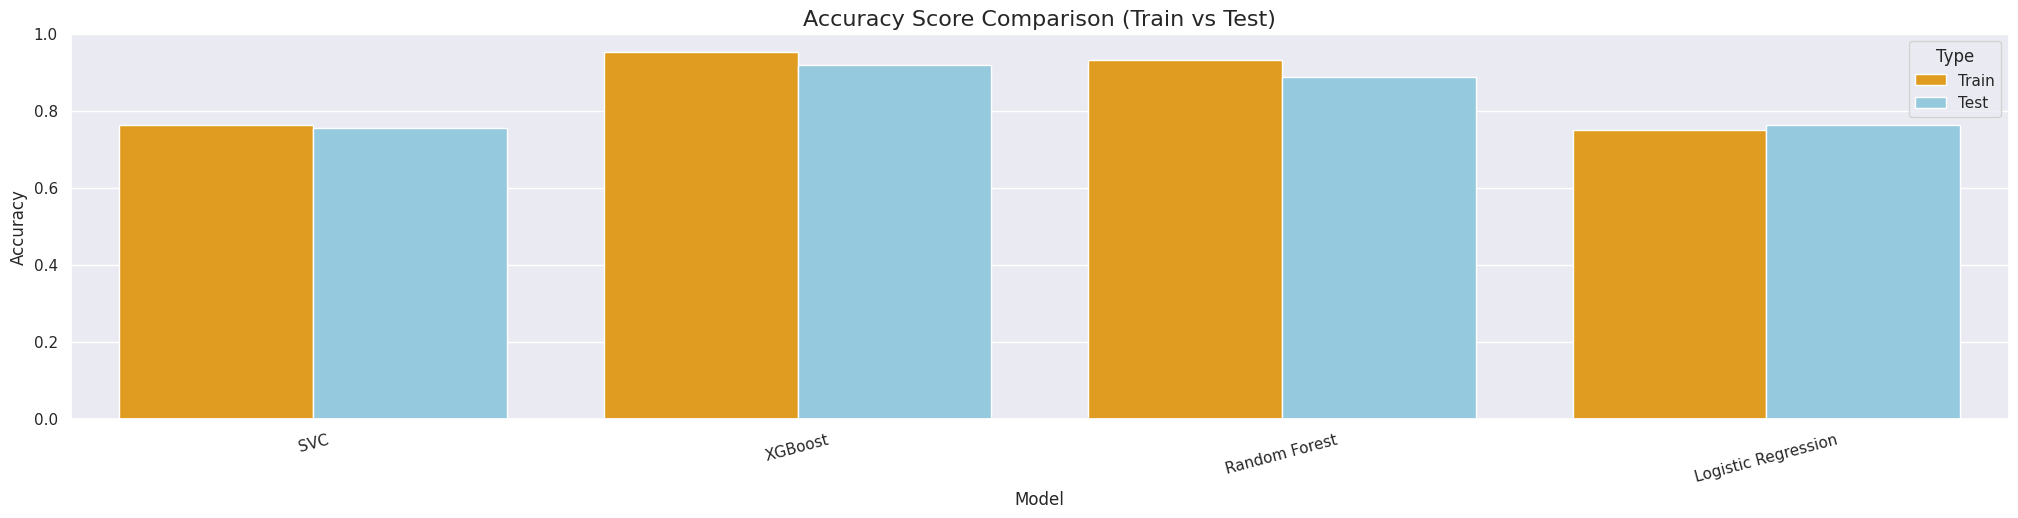

In [436]:
r2_scores_combined = []

for model in model_train_evaluation:
    r2_scores_combined.append({"Model": model, "Type": "Train", "Accuracy": model_train_evaluation[model]["Accuracy"]})
    r2_scores_combined.append({"Model": model, "Type": "Test", "Accuracy": model_test_evaluation[model]["Accuracy"]})

r2_scores_df = pd.DataFrame(r2_scores_combined)

sns.set(style="darkgrid")
sns.barplot(x="Model", y="Accuracy", hue="Type", data=r2_scores_df, palette=["orange", "skyblue"])
plt.title("Accuracy Score Comparison (Train vs Test)", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=15)
plt.ylim(0, 1)
plt.show()

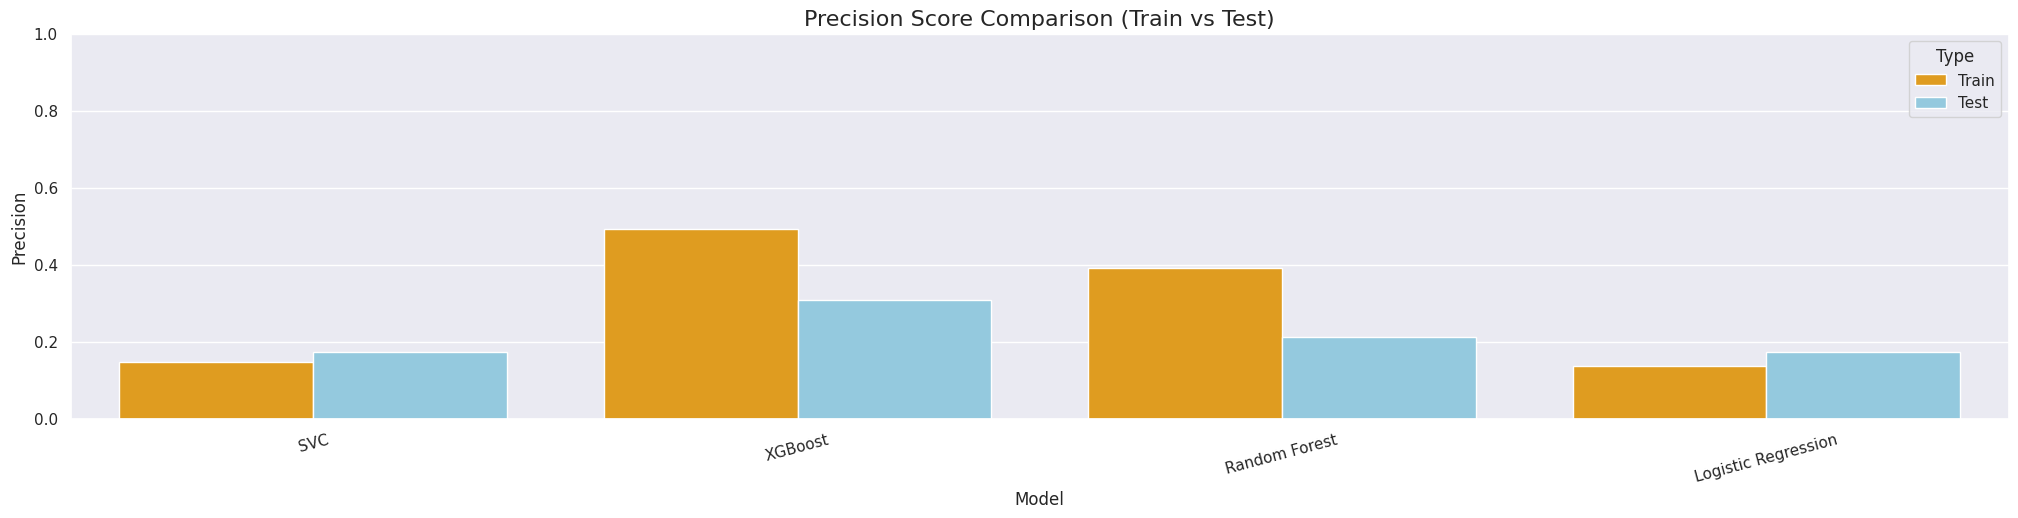

In [437]:
r2_scores_combined = []

for model in model_train_evaluation:
    r2_scores_combined.append({"Model": model, "Type": "Train", "Precision": model_train_evaluation[model]["Precision"]})
    r2_scores_combined.append({"Model": model, "Type": "Test", "Precision": model_test_evaluation[model]["Precision"]})

r2_scores_df = pd.DataFrame(r2_scores_combined)

sns.set(style="darkgrid")
sns.barplot(x="Model", y="Precision", hue="Type", data=r2_scores_df, palette=["orange", "skyblue"])
plt.title("Precision Score Comparison (Train vs Test)", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.xticks(rotation=15)
plt.ylim(0, 1)
plt.show()

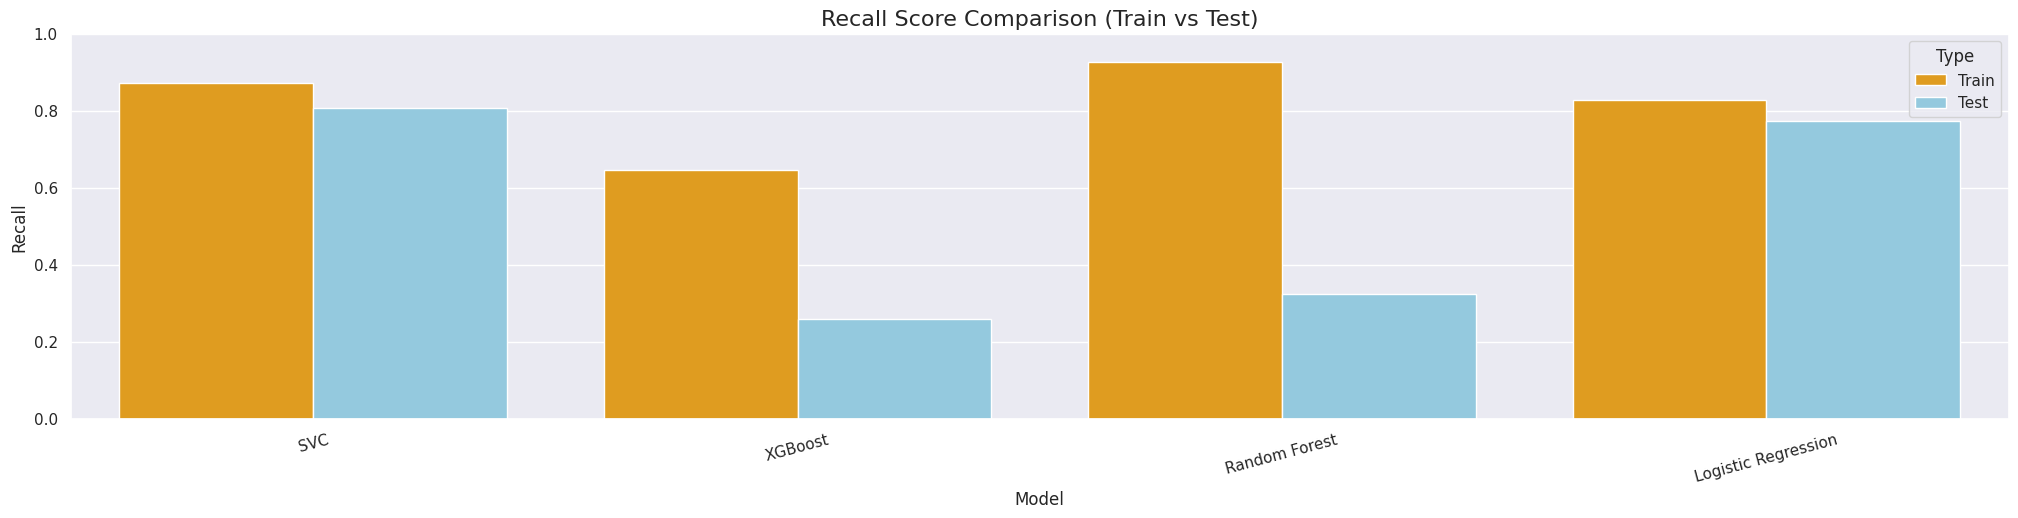

In [438]:
r2_scores_combined = []

for model in model_train_evaluation:
    r2_scores_combined.append({"Model": model, "Type": "Train", "Recall": model_train_evaluation[model]["Recall"]})
    r2_scores_combined.append({"Model": model, "Type": "Test", "Recall": model_test_evaluation[model]["Recall"]})

r2_scores_df = pd.DataFrame(r2_scores_combined)

sns.set(style="darkgrid")
sns.barplot(x="Model", y="Recall", hue="Type", data=r2_scores_df, palette=["orange", "skyblue"])
plt.title("Recall Score Comparison (Train vs Test)", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Recall", fontsize=12)
plt.xticks(rotation=15)
plt.ylim(0, 1)
plt.show()

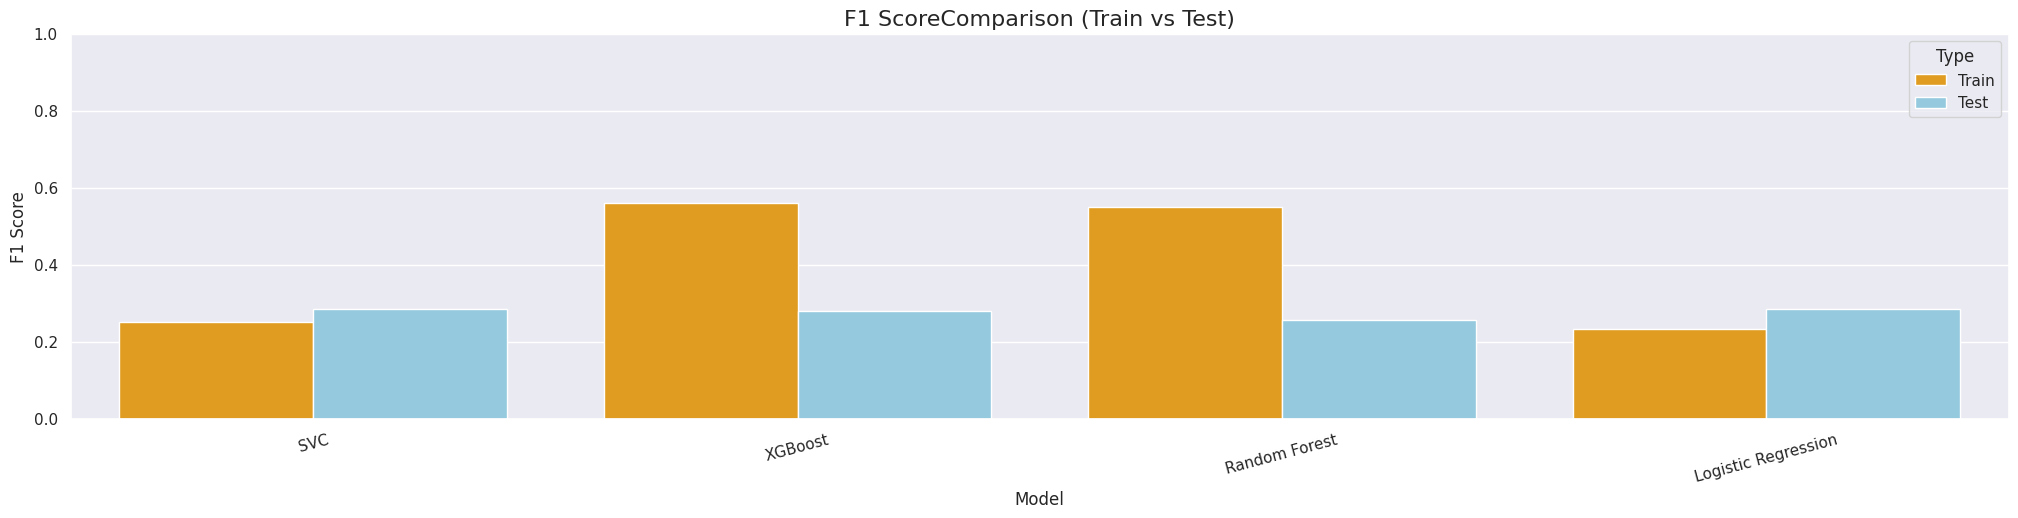

In [439]:
r2_scores_combined = []

for model in model_train_evaluation:
    r2_scores_combined.append({"Model": model, "Type": "Train", "F1 Score": model_train_evaluation[model]["F1 Score"]})
    r2_scores_combined.append({"Model": model, "Type": "Test", "F1 Score": model_test_evaluation[model]["F1 Score"]})

r2_scores_df = pd.DataFrame(r2_scores_combined)

sns.set(style="darkgrid")
sns.barplot(x="Model", y="F1 Score", hue="Type", data=r2_scores_df, palette=["orange", "skyblue"])
plt.title("F1 ScoreComparison (Train vs Test)", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("F1 Score", fontsize=12)
plt.xticks(rotation=15)
plt.ylim(0, 1)
plt.show()

In [440]:
with open(folder_path + "xgb_stroke_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("XGBoost model saved successfully!")

XGBoost model saved successfully!
